In [1]:
import pandas as pd
import numpy as np

### **Problem**: 

Estimating the water pump quality

<img src="hand_pump_diagram.png" width="300" height="240" align="center"/>

### **Source**: 

Data from **Taarifa** and the **Tanzanian Ministry of Water**

### **Approach:**

There are three possible conditions of pumps:

0. **functional**
1. **need some repairs**
2. **don't work at all**

We will predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed.

### **Importance:**

A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

### **Features:**

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

### **0. Reading data**

In [2]:
train = pd.read_csv('train_data.csv')

In [3]:
test = pd.read_csv('test_data.csv')

In [4]:
target = pd.read_csv('labels_data.csv')

In [5]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)
print('Target shape:', target.shape)

Train shape: (59400, 40)
Test shape: (14850, 40)
Target shape: (59400, 2)


In [6]:
train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [7]:
test.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


In [8]:
target.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


In [9]:
import matplotlib.pyplot as plt

mb this graph is better:

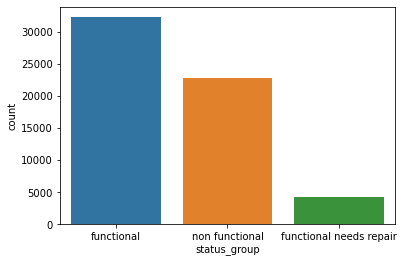

In [10]:
import seaborn as sns
sns.countplot(x='status_group', data=target)
pass

### **1. Processing data**

In [11]:
df = pd.merge(pd.concat([train, test]), target)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [12]:
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

#### We need to remember objects in each dataset split. We will use it after processing

In [13]:
train, test = train.index, test.index

#### Output columns with nan vals

In [14]:
nulls = df.isna().sum()
nulls = nulls[nulls != 0]
nulls

funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

#### To measure the significance of amount of missing values, let's compare number of each with total objects number

In [15]:
temp = nulls / df.shape[0] * 100
temp = temp.sort_values()

for x, name in zip(temp, temp.index):
    print(f'{name: <18}: ' + f'{round(x, 2)}'.ljust(4,'0') + '%')

subvillage        : 0.62%
permit            : 5.14%
public_meeting    : 5.61%
funder            : 6.12%
installer         : 6.15%
scheme_management : 6.53%
scheme_name       : 47.42%


#### 1.1. Let's drop column with the highest missing rate and objects that have NaN values in case that missing rate (< 10%) is not so significant

In [16]:
df.drop(columns='scheme_name', inplace=True)
df.shape

(59400, 40)

#### **Also we drop cat_columns with too large number of unique names**

In [17]:
cat_cols = list(df.select_dtypes(include=['object']).columns.values)
df[cat_cols].nunique()

date_recorded              356
funder                    1897
installer                 2145
wpt_name                 37400
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           12
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [18]:
mask = df[cat_cols].nunique() > 1000
cat_cols_to_drop = list(df[cat_cols].nunique()[mask].index)
df.drop(cat_cols_to_drop, axis=1, inplace=True)
cat_cols_to_drop

['funder', 'installer', 'wpt_name', 'subvillage', 'ward']

In [19]:
df.dropna(inplace=True)
df.shape

(49841, 35)

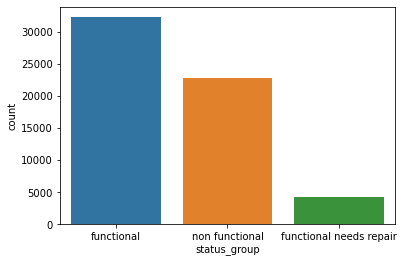

In [20]:
sns.countplot(x='status_group', data=target)
pass

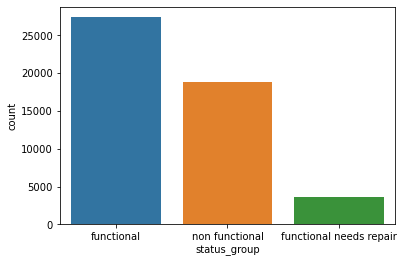

In [21]:
sns.countplot(x='status_group', data=df)
pass

Balance is pretty good:)

#### 1.2. Let's now bring all String columns to a general appearance(lower_case)

In [22]:
string_cols = list(df.select_dtypes(include=['object']).columns.values)
old_size = len(string_cols)

for col in string_cols:
    val = df[col].values[0]
    if not isinstance(val, str):
        string_cols.remove(col)
print('Num of not String columns removed:', old_size - len(string_cols))

Num of not String columns removed: 2


In [23]:
#old_size = df.installer.value_counts().shape[0]

In [24]:
for col in string_cols:
    df[col] = df[col].apply(str.lower)

#### Show changes in range of distribution after tranformation

In [25]:
#print('Removed', old_size - df.installer.value_counts().shape[0], 'repetitions')

#### 1.3. Let's transfrom our features into cozy format

In [26]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'gps_height', 'longitude',
       'latitude', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [27]:
import time
from datetime import datetime

Cast to time in seconds and drop *date_recorded*

In [28]:
df['timestamp'] = pd.to_datetime(df.date_recorded).astype('int64') // 10**9
df.drop(columns=['date_recorded'], inplace=True)

<ipython-input-28-6ab808ce5024>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['timestamp'] = pd.to_datetime(df.date_recorded).astype('int64') // 10**9


#### **Let's change target column to code**

In [29]:
def f(x):
    if x == 'functional':
        return 2
    elif x == 'non functional':
        return 0
    else:
        return 1
df['status_code'] = df['status_group'].apply(f)
df.drop('status_group', axis=1, inplace=True)

#### 1.4 Let's use one-hot encoding to remove categorical columns

In [30]:
num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns.values)
cat_cols = list(df.select_dtypes(include=['object']).columns.values)
pass

In [31]:
new_names = []
    
for col in cat_cols:
    encoded_features = pd.get_dummies(df[col])
    tmp_names = []
    for col_id in encoded_features.columns: 
        name = f'{col}_{col_id}'
        new_names.append(name)
        tmp_names.append(name)
    encoded_features.columns = tmp_names
    df = pd.concat([df, encoded_features], axis=1)
    
df.drop(columns=cat_cols, inplace=True)
cat_cols = new_names
df

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,0,0,0,0,1,0,0,0,0
5,9944,20.0,0,39.172796,-4.765587,0,4,8,1,2009,...,0,0,0,0,0,1,0,0,0,0
6,19816,0.0,0,33.362410,-3.766365,0,17,3,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999,...,0,0,0,0,0,1,0,0,0,0
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996,...,0,0,0,0,0,1,0,0,0,0
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0,...,0,1,0,0,0,0,0,1,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0,...,0,1,0,0,0,0,0,1,0,0


In [32]:
df.drop(columns='status_code', inplace=False)

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,0,0,0,0,1,0,0,0,0
5,9944,20.0,0,39.172796,-4.765587,0,4,8,1,2009,...,0,0,0,0,0,1,0,0,0,0
6,19816,0.0,0,33.362410,-3.766365,0,17,3,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999,...,0,0,0,0,0,1,0,0,0,0
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996,...,0,0,0,0,0,1,0,0,0,0
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0,...,0,1,0,0,0,0,0,1,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0,...,0,1,0,0,0,0,0,1,0,0


#### 1.5 Let's apply normalisation to numerical features

In [33]:
X_train = df[df.index.isin(train)].copy()
X_test = df[df.index.isin(test)].copy()
y_train = df[df.index.isin(train)].status_code.copy()
y_test =  df[df.index.isin(test)].status_code.copy()

In [34]:
X_train.drop(columns='status_code', axis=1, inplace=True)
X_test.drop(columns='status_code', axis=1, inplace=True)

In [35]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train shape: (49841, 305)
Test shape: (12433, 305)
Train target shape: (49841,)
Test target shape: (12433,)


#### Now we do not need *id* column, let's drop it

In [36]:
X_train.drop(columns=['id'], inplace=True)
X_test.drop(columns=['id'], inplace=True)

In [37]:
print('Min std:', abs(df.describe().std()).min())

Min std: 17224.70645014974


#### In case that we have pretty big stds (non-zero), so we suggest to use StandardScaler

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
num_cols.remove('id')
num_cols.remove('status_code')
num_cols

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'timestamp']

In [40]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
pass

#### According to the correlation matrix there no reason to drop any columns except, maybe, one of the following: *district_code* and *region_code*   
#### Come back to it later.

In [41]:
sns.set()

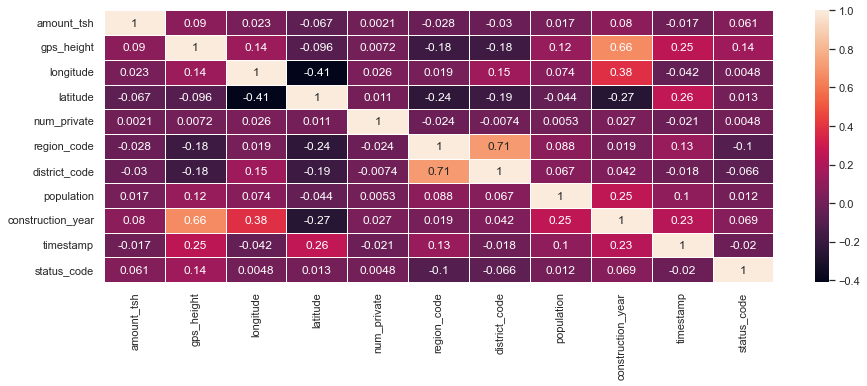

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
num_cols.append('status_code')
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=.5, ax=ax)
pass

#### Beautiful geo representation

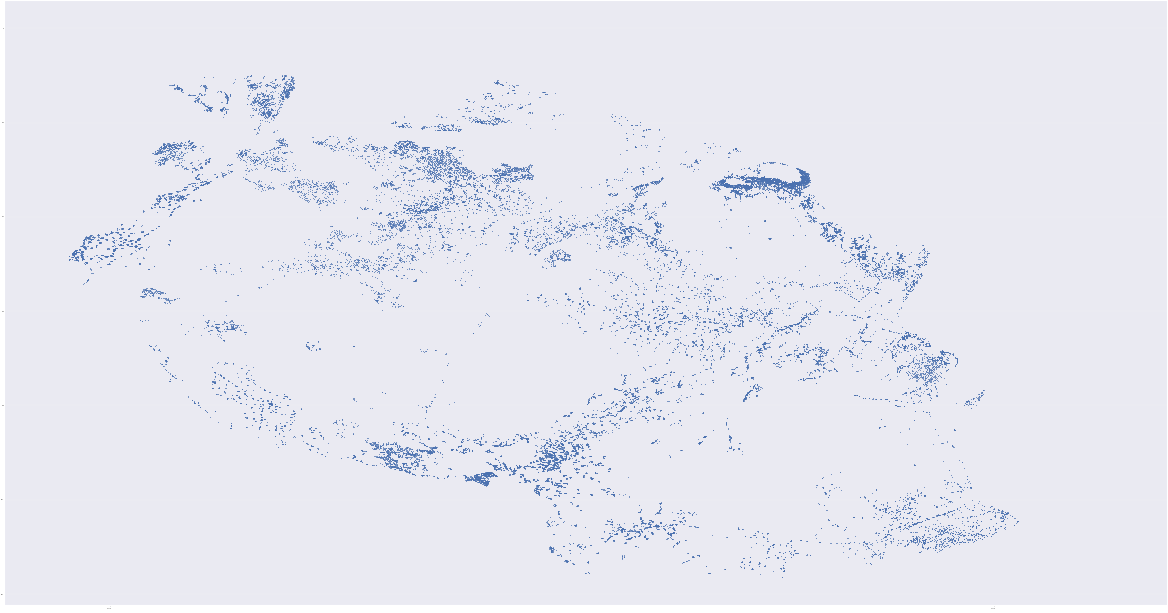

In [43]:
plt.figure(figsize=(150, 80), dpi=10)
plt.scatter(df.longitude, df.latitude)

plt.xlim(29)
plt.xscale('log')
plt.show()

### **2. Training**

#### **2.1 Logistic regression**

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
def Classification_Rate(a, b):
    lst = np.array(a) == np.array(b)
    return sum(lst)/len(a)

In [46]:
reg = LogisticRegression(max_iter=5000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

Classification_Rate(y_test, y_pred).round(3)

0.752

In [47]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Classification_Rate(y_test, y_pred).round(3)

/Users/scalyvladimir/miniforge3/envs/firstEnv/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.845

In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification_Rate(y_test, y_pred).round(3)

0.999

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

my_scorer = make_scorer(Classification_Rate, greater_is_better=True)

log_params = {
    'C': np.logspace(-2, 5),
    'penalty': ['l2'],
    'max_iter': [5000]
}

gs = GridSearchCV(LogisticRegression(), log_params, scoring=my_scorer)
gs.fit(X_train.values, y_train.values.ravel())

y_pred = gs.predict(X_test.values)

Classification_Rate(y_test, y_pred).round(3)

### **3. Augumenting data**

### **4. Conclutions**